In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut, GridSearchCV
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

### 1. Tree-Based Methods
### (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [2]:
train_file = "../data/aps_failure_training_set.csv"
test_file = "../data/aps_failure_test_set.csv"

train_data = pd.read_csv(train_file, skiprows=20, na_values="na") 
test_data = pd.read_csv(test_file, skiprows=20, na_values="na")

print("Training Data:")
display(train_data)
print("\nTest Data:")
display(test_data)

Training Data:


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0



Test Data:


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


### (b) Data Preparation: This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.

### i. Research what types of techniques are usually used for dealing with data withmissing values. Pick at least one of them and apply it to this data in the next steps.

In [3]:
print(train_data.isnull().sum())

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64


In [4]:
print(test_data.isnull().sum())

class         0
aa_000        0
ab_000    12363
ac_000      926
ad_000     3981
          ...  
ee_007      192
ee_008      192
ee_009      192
ef_000      762
eg_000      762
Length: 171, dtype: int64


Since the 'class' column in both the training and testing datasets is complete (no missing values), we will perform imputation on the remaining columns.

In [5]:
X_train = train_data.drop(columns=['class'])  
y_train = train_data['class']                 

X_test = test_data.drop(columns=['class'])
y_test = test_data['class']

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test) 

X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

train_processed = pd.concat([X_train_imputed, y_train.reset_index(drop=True)], axis=1)
test_processed = pd.concat([X_test_imputed, y_test.reset_index(drop=True)], axis=1)

print("Training Data Imputed:")
display(train_processed)
print("\nTest Data Imputed:")
display(test_processed)

Training Data Imputed:


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,neg
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,neg
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,neg
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,neg
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0,neg
59996,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0,neg
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0,neg
59998,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0,neg



Test Data Imputed:


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0,neg
1,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0,neg
2,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0,neg
3,59816.0,0.713189,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0,neg
4,1814.0,0.713189,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,0.713189,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0,neg
15996,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0,neg
15997,79636.0,0.713189,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0,neg
15998,110.0,0.713189,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0,neg


### ii.For each of the 170 features, calculate the coefficient of variation CV=s/m,where s is sample standard deviation and m is sample mean.

In [6]:
X_train = train_processed.drop(columns=['class'])
feature_means = X_train.mean()
feature_stds = X_train.std()

cv_values = feature_stds / feature_means
cv_stats = pd.DataFrame({
    'Mean': feature_means,
    'Standard Deviation': feature_stds,
    'Coefficient of Variation (CV)': cv_values
})

display(cv_stats.sort_values(by='Coefficient of Variation (CV)', ascending=False))

,Mean,Standard Deviation,Coefficient of Variation (CV)
cs_009,7.791978e+02,1.833278e+05,235.277605
cf_000,1.902218e+05,3.504515e+07,184.233092
co_000,1.905156e+05,3.504515e+07,183.949017
ad_000,1.906206e+05,3.504515e+07,183.847620
dh_000,4.707073e+03,5.412428e+05,114.984991
...,...,...,...
bo_000,5.131478e+05,2.373636e+05,0.462564
bp_000,5.513898e+05,2.348736e+05,0.425967
bq_000,5.828713e+05,2.326773e+05,0.399192
br_000,6.048866e+05,2.314713e+05,0.382669


### iii. Plot a correlation matrix for your features using pandas or any other tool.

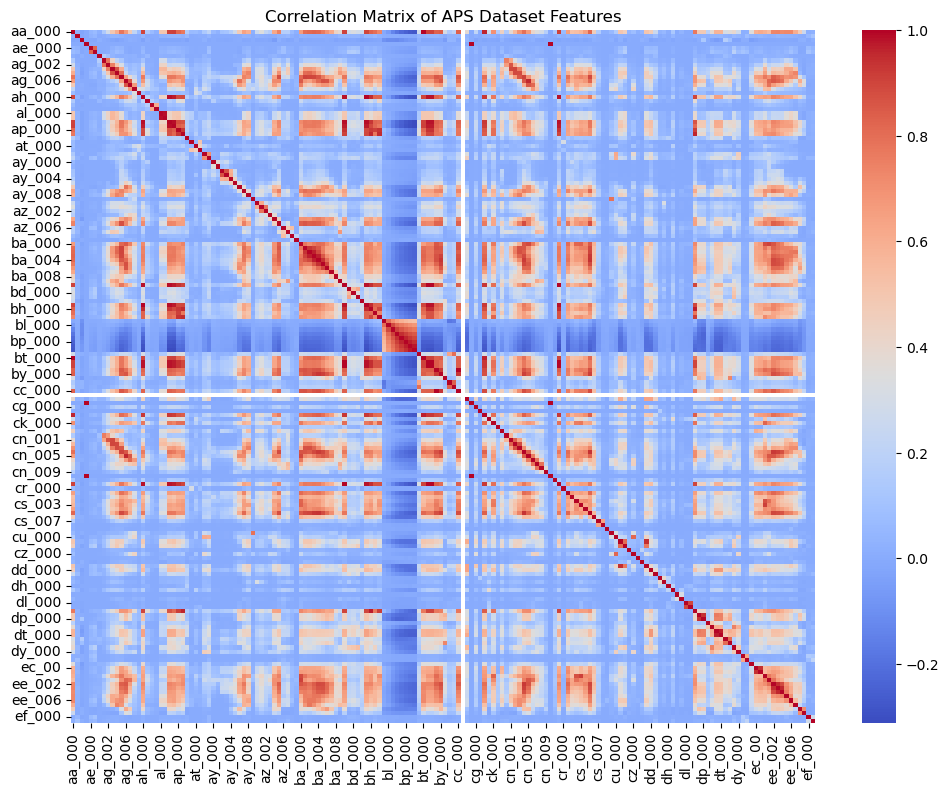

In [7]:
features_data = train_processed.iloc[:, :-1]

correlation_matrix = features_data.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix of APS Dataset Features")
plt.show()

### iv. Pick sqrt(170) features with highest CV, and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

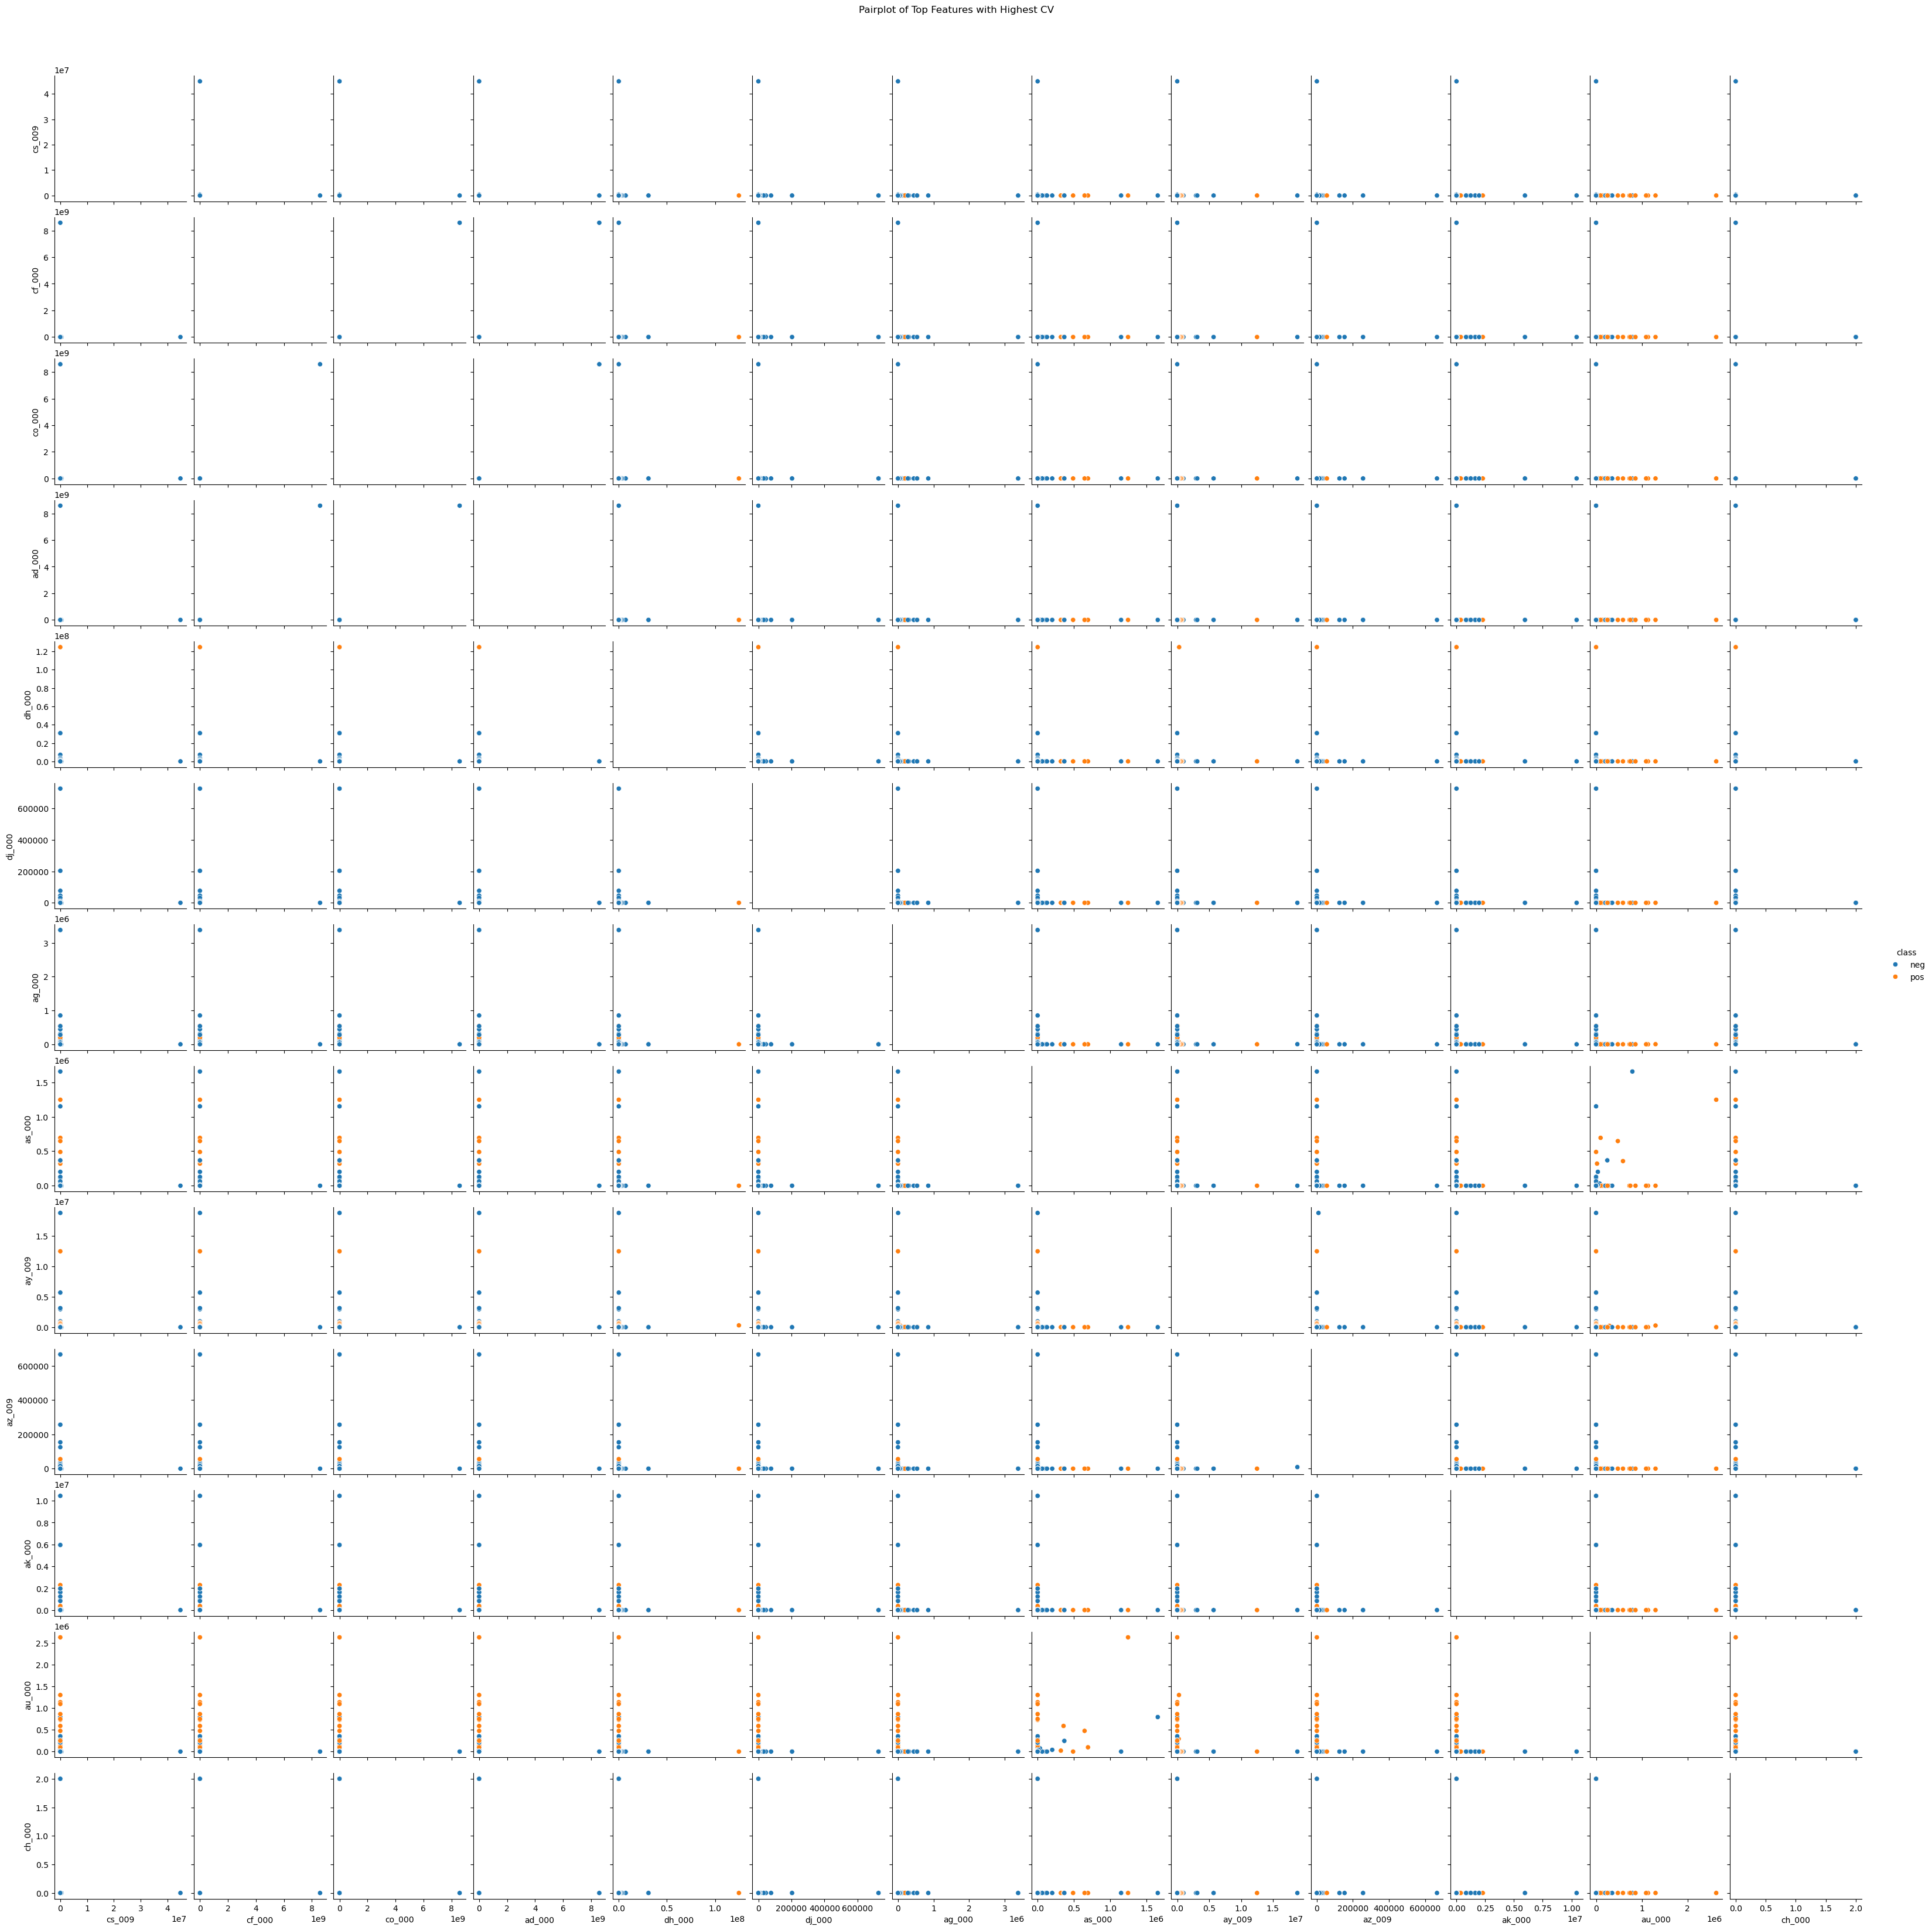

In [8]:
features_data = train_processed.iloc[:, :-1]
target_data = train_processed.iloc[:, -1]
top_features = cv_values.nlargest(13).index

top_features_data = train_processed[top_features].copy()
top_features_data.loc[:, 'class'] = target_data

pairplots = sns.pairplot(top_features_data, hue='class', diag_kind='none', height=2.5)
plt.suptitle("Pairplot of Top Features with Highest CV", y=1.02)
plt.show()

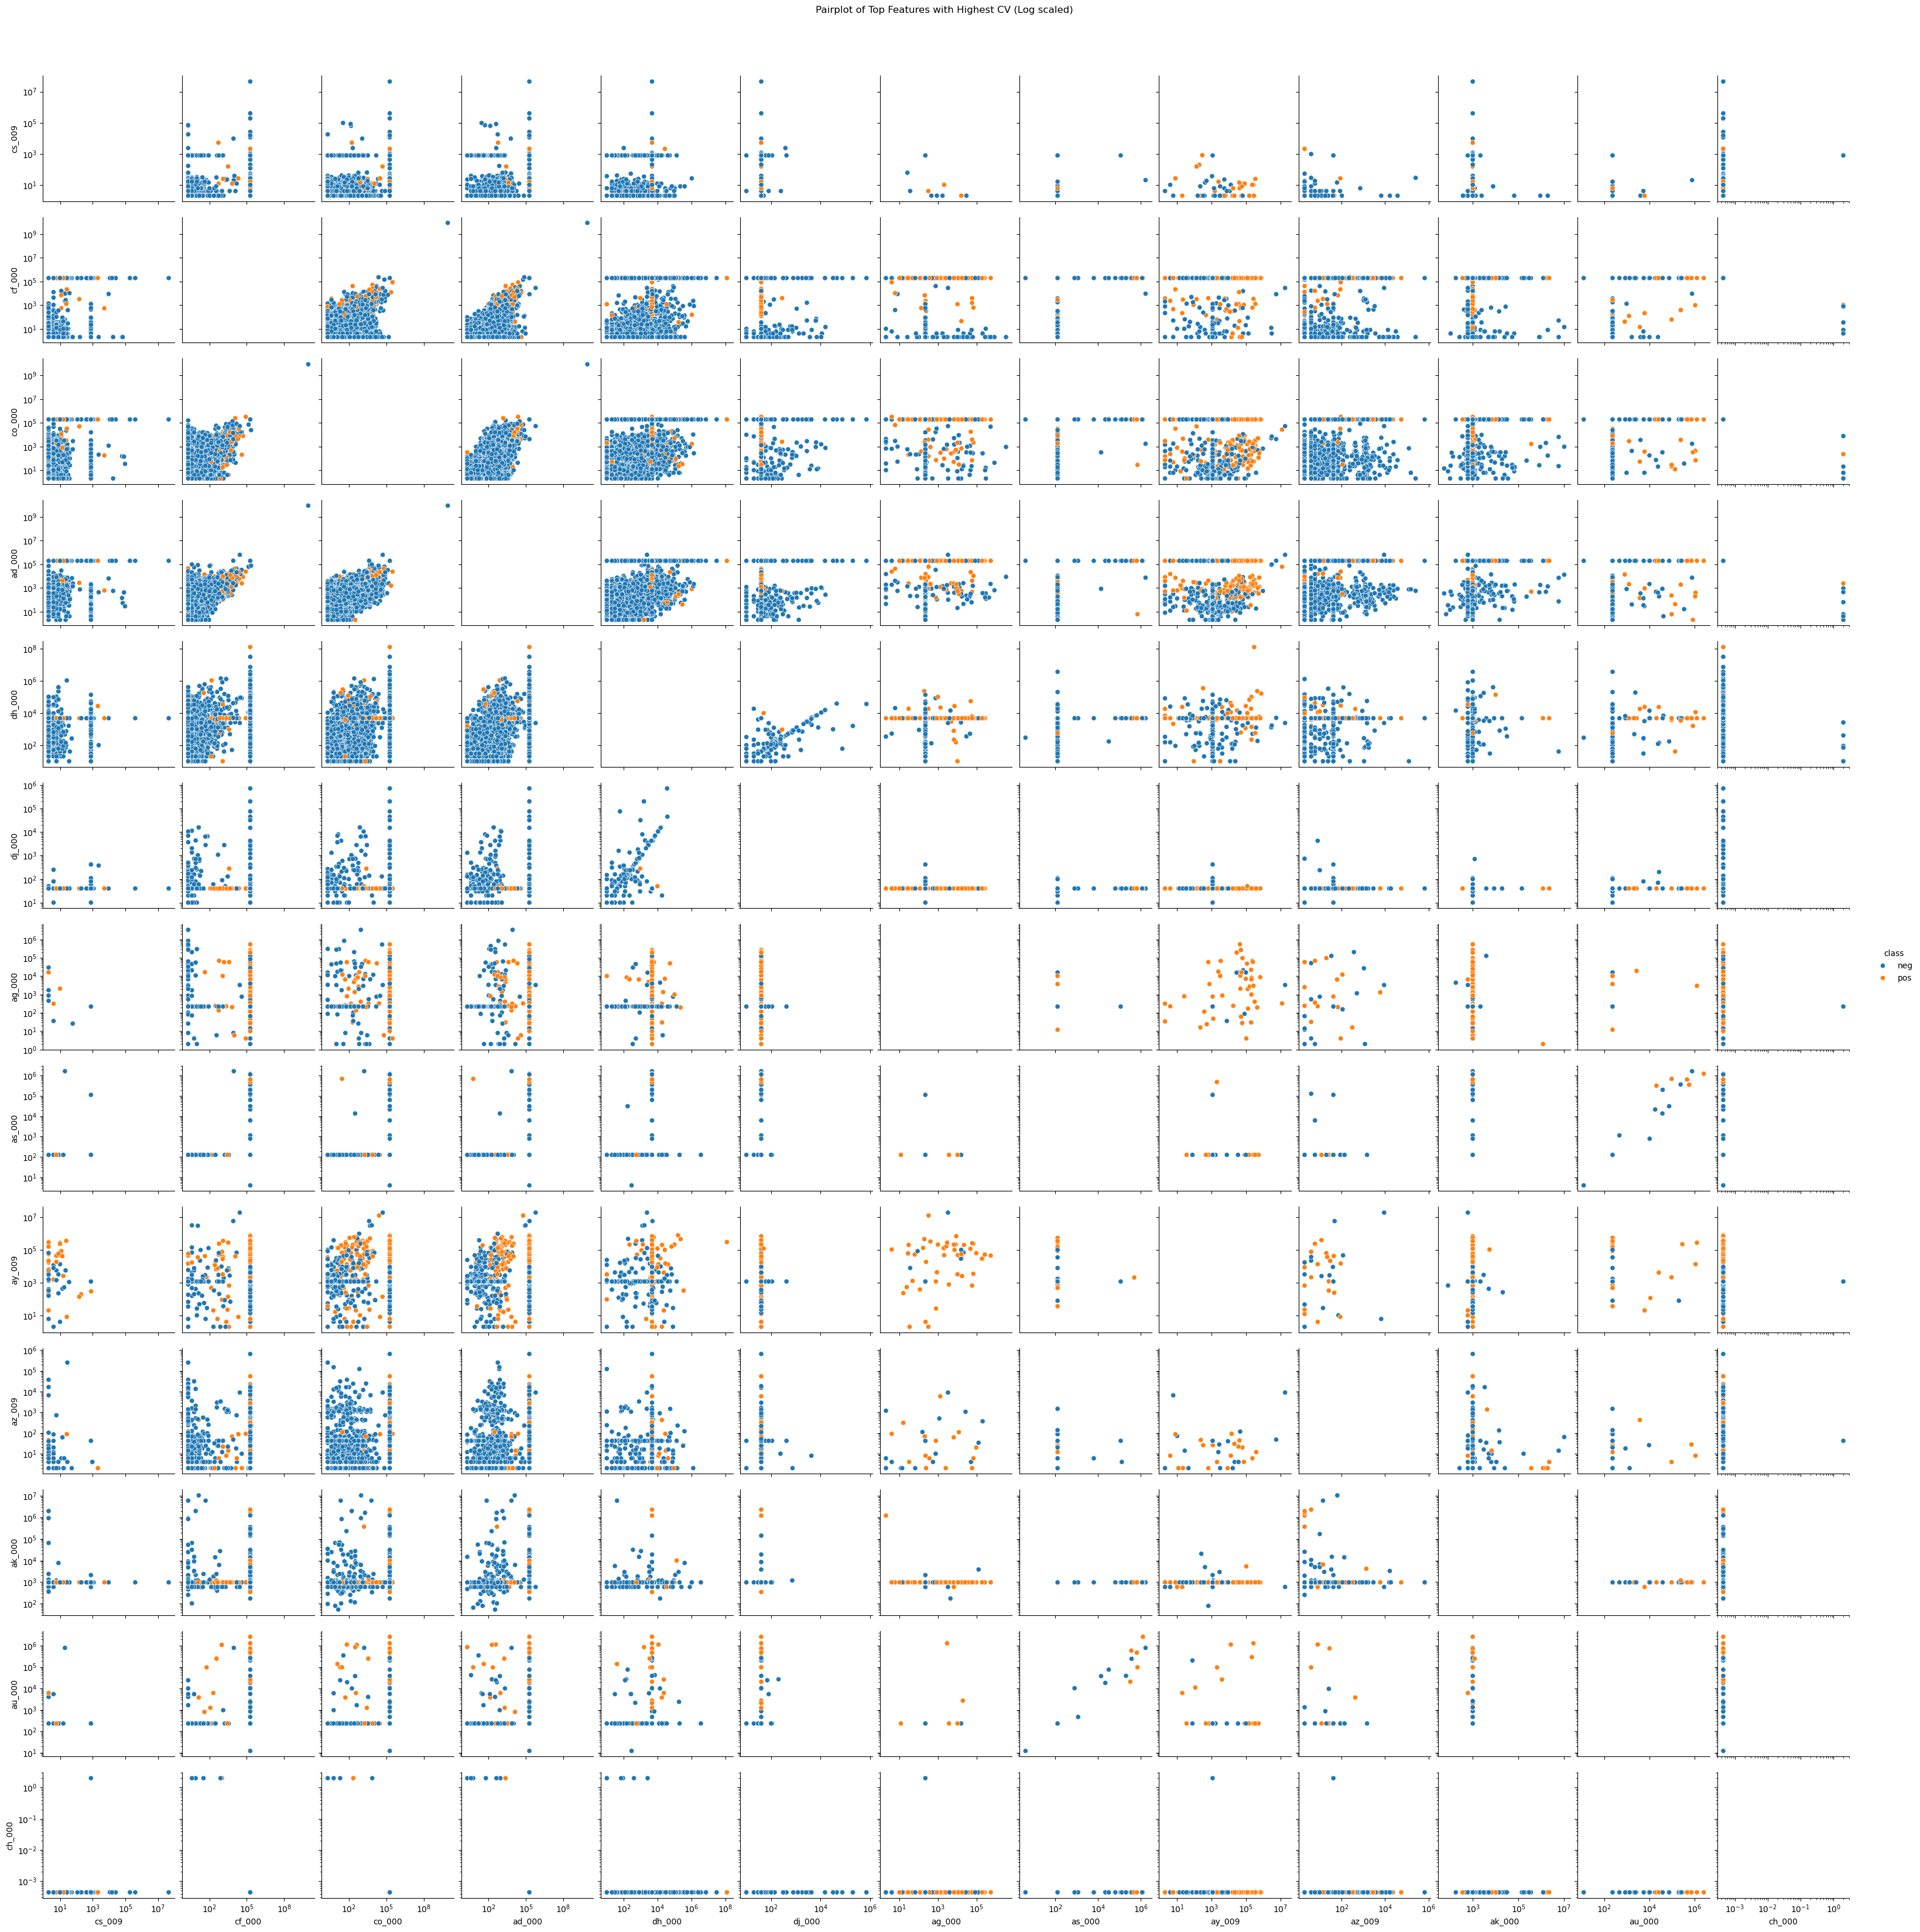

In [9]:
#Applying log scale for better readability

pairplots = sns.pairplot(top_features_data, hue='class', diag_kind='none', height=2.5)
pairplots.set(xscale="log", yscale="log")
plt.suptitle("Pairplot of Top Features with Highest CV (Log scaled)", y=1.02)
plt.show()

It is difficult to draw meaningful conclusions based solely on the scatter plots, as they offer limited insight at this stage.

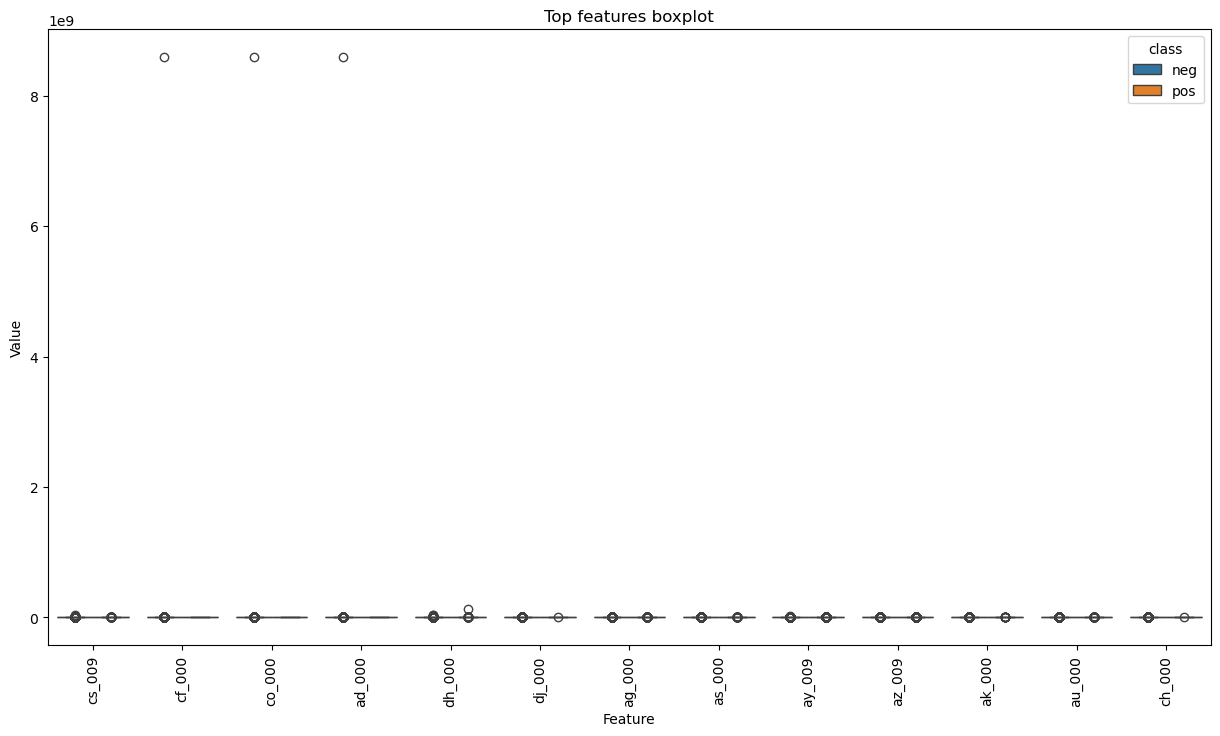

In [10]:
melted_data = pd.melt(top_features_data, id_vars='class', var_name='Feature', value_name='Value')

plt.figure(figsize=(15, 8))
boxplots = sns.boxplot(x='Feature', y='Value', hue='class', data=melted_data)
plt.title("Top features boxplot")
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.xlabel("Feature")
plt.ylabel("Value")
plt.show()

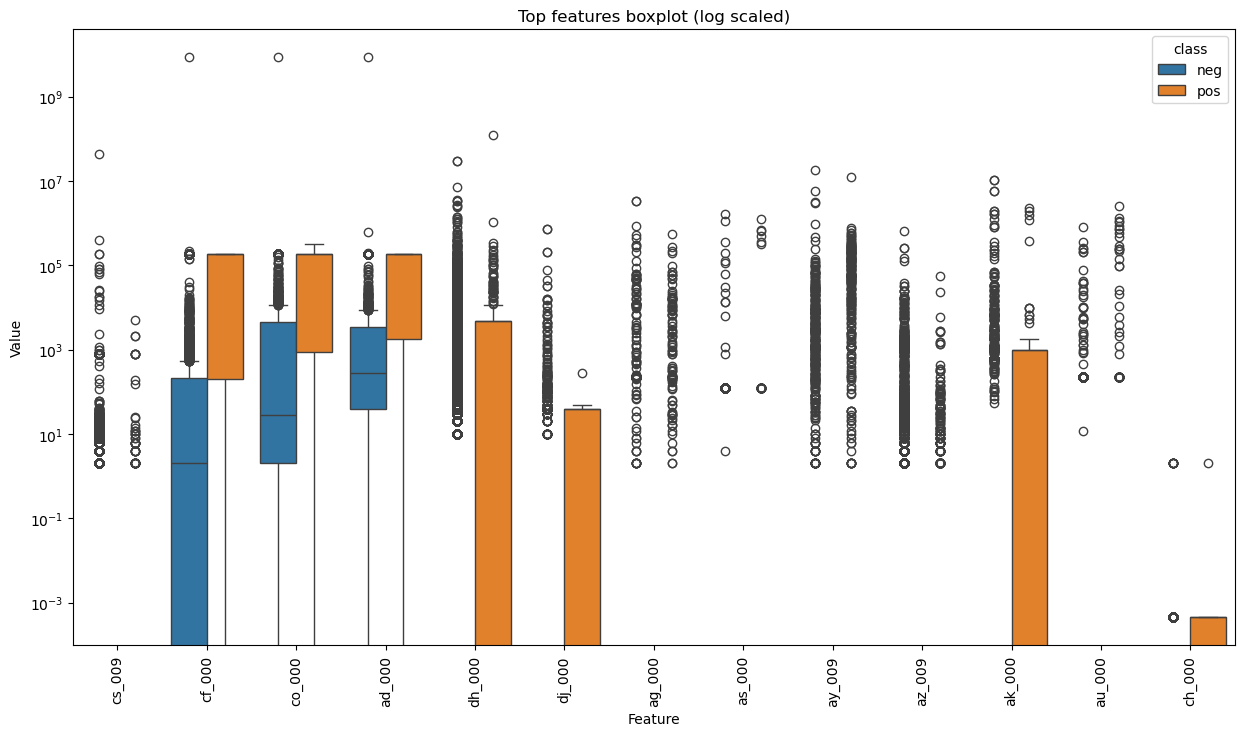

In [11]:
# Using log scale for better display result
plt.figure(figsize=(15, 8))
boxplots = sns.boxplot(x='Feature', y='Value', hue='class', data=melted_data)
boxplots.set(yscale="log")  
plt.title("Top features boxplot (log scaled)")
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.xlabel("Feature")
plt.ylabel("Value")
plt.show()

### v. Determine the number of positive and negative data. Is this data set imbalanced?

In [12]:
print("Distribution in training set:")
display(train_processed["class"].value_counts())
print("Distribution in testing set:")
display(test_processed["class"].value_counts())

Distribution in training set:


class
neg    59000
pos     1000
Name: count, dtype: int64

Distribution in testing set:


class
neg    15625
pos      375
Name: count, dtype: int64

#### As we can see data set in highly imbalanced.

### (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [13]:
X_train = train_processed.iloc[:, :-1]  
y_train = train_processed.iloc[:, -1]   

X_test = test_processed.iloc[:, :-1]
y_test = test_processed.iloc[:, -1]

rf = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

y_train_prob = rf.predict_proba(X_train)[:, 1]  
y_test_prob = rf.predict_proba(X_test)[:, 1]

In [14]:
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("Training Confusion Matrix:")
print(train_cm)
print("\nTest Confusion Matrix:")
print(test_cm)

Training Confusion Matrix:
[[59000     0]
 [    1   999]]

Test Confusion Matrix:
[[15609    16]
 [  107   268]]


In [15]:
train_error = 1 - accuracy_score(y_train, y_train_pred)
test_error = 1 - accuracy_score(y_test, y_test_pred)

print(f"Training Misclassification Rate: {train_error}")
print(f"Test Misclassification Rate: {test_error}")


Training Misclassification Rate: 1.666666666666483e-05
Test Misclassification Rate: 0.007687499999999958


In [16]:
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print(f"Training AUC: {train_auc}")
print(f"Test AUC: {test_auc}")


Training AUC: 1.0
Test AUC: 0.9941632853333333


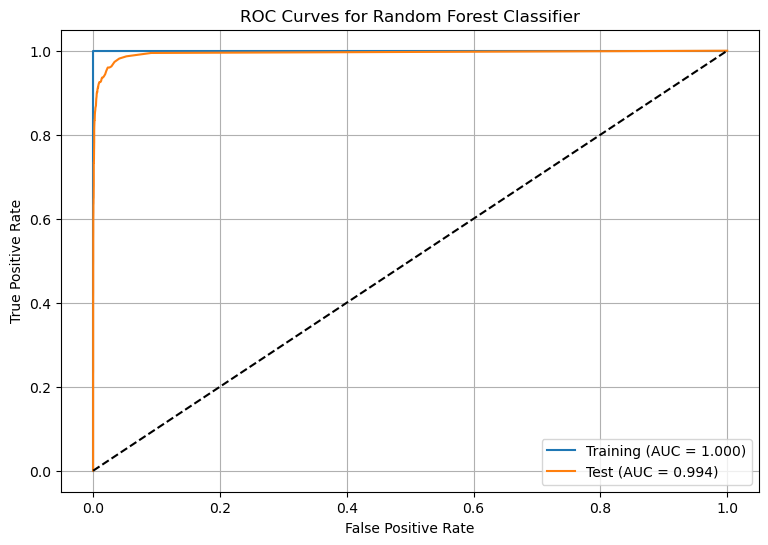

In [17]:
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob, pos_label='pos')
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob, pos_label='pos')

plt.figure(figsize=(9, 6))
plt.plot(train_fpr, train_tpr, label=f'Training (AUC = {train_auc:.3f})')
plt.plot(test_fpr, test_tpr, label=f'Test (AUC = {test_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest Classifier')
plt.legend()
plt.grid()
plt.show()


In [18]:
# Calculate OOB error
oob_error = 1 - rf.oob_score_
print(f"Out-of-Bag Error Estimate: {oob_error}")
print(f"Difference between OOB and Test Error: {oob_error - test_error}")


Out-of-Bag Error Estimate: 0.00605
Difference between OOB and Test Error: -0.0016374999999999584


### (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c

In [19]:
rf_balanced = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, oob_score=True)
rf_balanced.fit(X_train, y_train)

y_train_pred_balanced = rf_balanced.predict(X_train)
y_test_pred_balanced = rf_balanced.predict(X_test)

y_train_prob_balanced = rf_balanced.predict_proba(X_train)[:, 1]  # Positive class probability
y_test_prob_balanced = rf_balanced.predict_proba(X_test)[:, 1]

In [20]:
train_cm_balanced = confusion_matrix(y_train, y_train_pred_balanced)
test_cm_balanced = confusion_matrix(y_test, y_test_pred_balanced)

print("Training Confusion Matrix:")
print(train_cm_balanced)
print("\nTest Confusion Matrix:")
print(test_cm_balanced)

Training Confusion Matrix:
[[59000     0]
 [    1   999]]

Test Confusion Matrix:
[[15613    12]
 [  166   209]]


In [21]:
train_error_balanced = 1 - accuracy_score(y_train, y_train_pred_balanced)
test_error_balanced = 1 - accuracy_score(y_test, y_test_pred_balanced)

print(f"Training Misclassification Rate: {train_error_balanced}")
print(f"Test Misclassification Rate: {test_error_balanced}")


Training Misclassification Rate: 1.666666666666483e-05
Test Misclassification Rate: 0.011125000000000052


In [22]:
train_auc_balanced = roc_auc_score(y_train, y_train_prob_balanced)
test_auc_balanced = roc_auc_score(y_test, y_test_prob_balanced)

print(f"Training AUC: {train_auc_balanced}")
print(f"Test AUC: {test_auc_balanced}")


Training AUC: 1.0
Test AUC: 0.9864612693333332


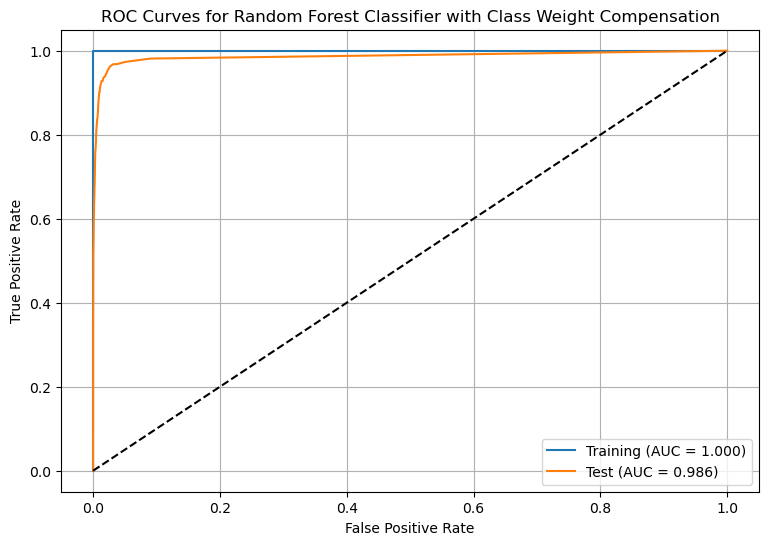

In [23]:
train_fpr_balanced, train_tpr_balanced, _ = roc_curve(y_train, y_train_prob_balanced, pos_label='pos')
test_fpr_balanced, test_tpr_balanced, _ = roc_curve(y_test, y_test_prob_balanced, pos_label='pos')

plt.figure(figsize=(9, 6))
plt.plot(train_fpr_balanced, train_tpr_balanced, label=f'Training (AUC = {train_auc_balanced:.3f})')
plt.plot(test_fpr_balanced, test_tpr_balanced, label=f'Test (AUC = {test_auc_balanced:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest Classifier with Class Weight Compensation')
plt.legend()
plt.grid()
plt.show()

In [24]:
oob_error_balanced = 1 - rf_balanced.oob_score_
print(f"Out-of-Bag Error Estimate: {oob_error_balanced}")
print(f"Difference between OOB and Test Error: {oob_error_balanced - test_error_balanced}")

Out-of-Bag Error Estimate: 0.007683333333333375
Difference between OOB and Test Error: -0.003441666666666676


In [25]:
results_comparison = {
    "Metric": [
        "Training Confusion Matrix", 
        "Test Confusion Matrix", 
        "Training AUC", 
        "Test AUC", 
        "Training Misclassification Rate", 
        "Test Misclassification Rate", 
        "Out-of-Bag Error"
    ],
    "Random Forest (Imbalanced)": [
        train_cm, 
        test_cm, 
        train_auc, 
        test_auc, 
        train_error, 
        test_error, 
        oob_error
    ],
    "Random Forest (Balanced)": [
        train_cm_balanced, 
        test_cm_balanced, 
        train_auc_balanced, 
        test_auc_balanced, 
        train_error_balanced, 
        test_error_balanced, 
        oob_error_balanced
    ]
}
results_df = pd.DataFrame(results_comparison)
print("Comparison of Random Forest Results Before and After Class Weight Compensation:")
results_df

Comparison of Random Forest Results Before and After Class Weight Compensation:


,Metric,Random Forest (Imbalanced),Random Forest (Balanced)
0,Training Confusion Matrix,"[[59000, 0], [1, 999]]","[[59000, 0], [1, 999]]"
1,Test Confusion Matrix,"[[15609, 16], [107, 268]]","[[15613, 12], [166, 209]]"
2,Training AUC,1.0,1.0
3,Test AUC,0.994163,0.986461
4,Training Misclassification Rate,0.000017,0.000017
5,Test Misclassification Rate,0.007687,0.011125
6,Out-of-Bag Error,0.00605,0.007683


### (e) XGBoost and Model Trees
### In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has ∑jßjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node. One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine œ(the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [26]:
y_train_numeric = (y_train == 'pos').astype(int)
y_test_numeric = (y_test == 'pos').astype(int)
dtrain = xgb.DMatrix(X_train, label=y_train_numeric)
dtest = xgb.DMatrix(X_test, label=y_test_numeric)
alpha_values = np.logspace(-3, 3, num=10)
best_alpha = None
best_cv_error = float('inf')
kf = KFold(n_splits=5, shuffle=False)

In [27]:
for alpha in alpha_values:
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'lambda': 0,
        'alpha': alpha,
        'eta': 0.1,
        'max_depth': 3
    }
    cv_results = xgb.cv(params, dtrain, num_boost_round=100, folds=kf, early_stopping_rounds=10, metrics='logloss', seed=42)
    mean_cv_error = cv_results['test-logloss-mean'].min()
    if mean_cv_error < best_cv_error:
        best_cv_error = mean_cv_error
        best_alpha = alpha

print("Best Alpha = {}".format(best_alpha))
print(f"Best CV Error: {best_cv_error}\n")

Best Alpha = 0.021544346900318832
Best CV Error: 0.021196565635433456



In [28]:
parameters = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'lambda': 0,
    'alpha': best_alpha,
    'eta': 0.1,
    'max_depth': 3
}
best_xgb_model = xgb.train(parameters, dtrain, num_boost_round=100)

In [29]:
y_train_prob = best_xgb_model.predict(dtrain)
y_test_prob = best_xgb_model.predict(dtest)

y_train_pred = (y_train_prob >= 0.5).astype(int)
y_test_pred = (y_test_prob >= 0.5).astype(int)

train_cm = confusion_matrix(y_train_numeric, y_train_pred)
train_error = 1 - accuracy_score(y_train_numeric, y_train_pred)
train_auc = roc_auc_score(y_train_numeric, y_train_prob)

test_cm = confusion_matrix(y_test_numeric, y_test_pred)
test_error = 1 - accuracy_score(y_test_numeric, y_test_pred)
test_auc = roc_auc_score(y_test_numeric, y_test_prob)

print("Training Confusion Matrix:")
print(train_cm)
print(f"Training Error: {train_error}")
print(f"Training AUC: {train_auc}")

print("\nTest Confusion Matrix:")
print(test_cm)
print(f"Test Error: {test_error}")
print(f"Test AUC: {test_auc}")


Training Confusion Matrix:
[[58940    60]
 [  219   781]]
Training Error: 0.004650000000000043
Training AUC: 0.9955093220338983

Test Confusion Matrix:
[[15601    24]
 [  118   257]]
Test Error: 0.008874999999999966
Test AUC: 0.9953841493333333


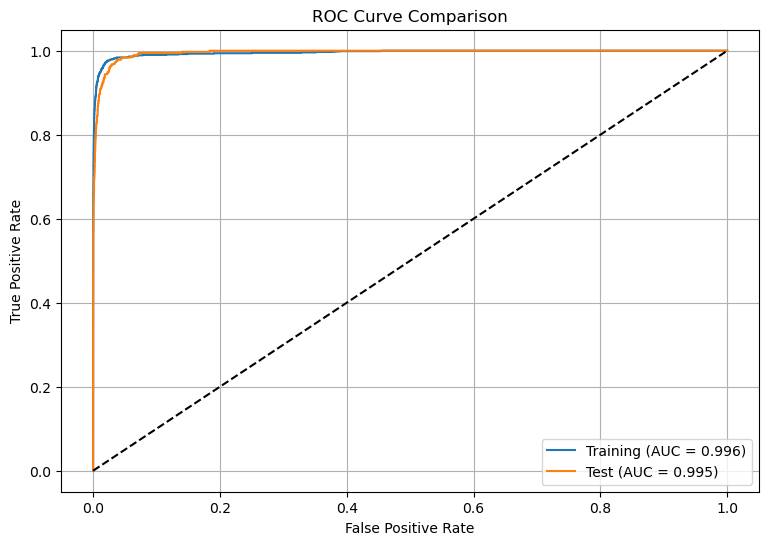

In [30]:
train_fpr, train_tpr, _ = roc_curve(y_train_numeric, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test_numeric, y_test_prob)

plt.figure(figsize=(9, 6))
plt.plot(train_fpr, train_tpr, label=f'Training (AUC = {train_auc:.3f})')
plt.plot(test_fpr, test_tpr, label=f'Test (AUC = {test_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

### (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train XGBosst with L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.

In [31]:
smote = SMOTE(sampling_strategy='auto', random_state=68, k_neighbors = 5)
xgb = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc')

pipeline = Pipeline([
    ('smote', smote),
    ('xgb', xgb)
])

parameter_grid = {
    'xgb__alpha': np.logspace(-3, 3, num=10)
}

kf_cv = KFold(n_splits=5, shuffle=False)

In [32]:
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=parameter_grid,
    cv=kf_cv,
    scoring='roc_auc',
    n_jobs=-1
)

grid.fit(X_train, y_train_numeric)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=68)),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='auc',
                                                      feature_typ...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='roc_auc')

In [33]:
best_alpha = grid.best_params_['xgb__alpha']
print('Best Alpha for SMOTE = {}\n'.format(best_alpha))
smote_model = grid.best_estimator_

Best Alpha for SMOTE = 10.0



In [34]:
y_train_prob_smote = smote_model.predict_proba(X_train)[:, 1]
y_test_prob_smote = smote_model.predict_proba(X_test)[:, 1]

y_train_pred_smote = smote_model.predict(X_train)
y_test_pred_smote = smote_model.predict(X_test)

train_cm_smote = confusion_matrix(y_train_numeric, y_train_pred_smote)
train_error_smote = 1 - accuracy_score(y_train_numeric, y_train_pred_smote)
train_auc_smote = roc_auc_score(y_train_numeric, y_train_prob_smote)

test_cm_smote = confusion_matrix(y_test_numeric, y_test_pred_smote)
test_error_smote = 1 - accuracy_score(y_test_numeric, y_test_pred_smote)
test_auc_smote = roc_auc_score(y_test_numeric, y_test_prob_smote)

print("Training Confusion Matrix:")
print(train_cm_smote)
print(f"Training Error: {train_error_smote}")
print(f"Training AUC: {train_auc_smote}")

print("\nTest Confusion Matrix:")
print(test_cm_smote)
print(f"Test Error: {test_error_smote}")
print(f"Test AUC: {test_auc_smote}")


Training Confusion Matrix:
[[58955    45]
 [   22   978]]
Training Error: 0.0011166666666666547
Training AUC: 0.9998326016949153

Test Confusion Matrix:
[[15562    63]
 [   62   313]]
Test Error: 0.0078125
Test AUC: 0.9941247999999999


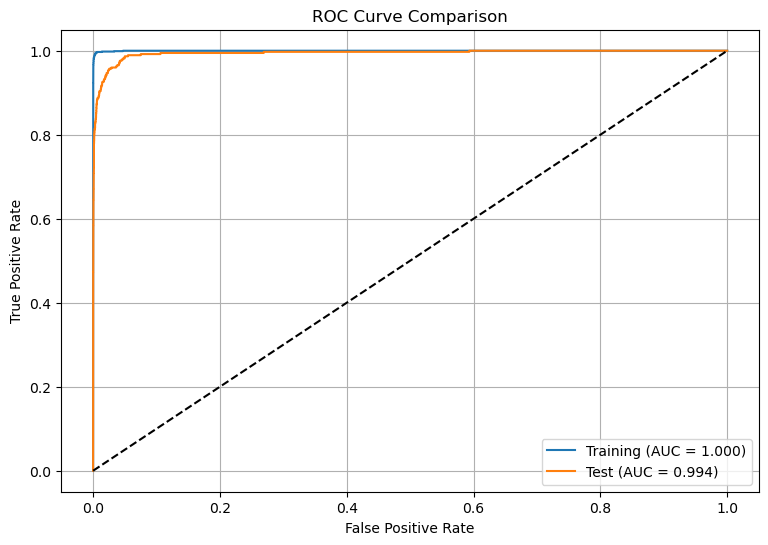

In [35]:
train_smote_fpr, train_smote_tpr, _ = roc_curve(y_train_numeric, y_train_prob_smote)
test_smote_fpr, test_smote_tpr, _ = roc_curve(y_test_numeric, y_test_prob_smote)

plt.figure(figsize=(9, 6))
plt.plot(train_smote_fpr, train_smote_tpr, label=f'Training (AUC = {train_auc_smote:.3f})')
plt.plot(test_smote_fpr, test_smote_tpr, label=f'Test (AUC = {test_auc_smote:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

In [36]:
results_comparison = {
    "Metric": [
        "Training Confusion Matrix", 
        "Test Confusion Matrix", 
        "Training AUC", 
        "Test AUC", 
        "Training Misclassification Rate", 
        "Test Misclassification Rate"
    ],
    "XGBoost (Best Alpha)": [
        train_cm, 
        test_cm, 
        train_auc, 
        test_auc, 
        train_error, 
        test_error
    ],
    "XGBoost with SMOTE": [
        train_cm_smote, 
        test_cm_smote, 
        train_auc_smote, 
        test_auc_smote, 
        train_error_smote, 
        test_error_smote
    ]
}
results_df = pd.DataFrame(results_comparison)
print("Comparison of uncompensated case with SMOTE case:")
results_df

Comparison of uncompensated case with SMOTE case:


,Metric,XGBoost (Best Alpha),XGBoost with SMOTE
0,Training Confusion Matrix,"[[58940, 60], [219, 781]]","[[58955, 45], [22, 978]]"
1,Test Confusion Matrix,"[[15601, 24], [118, 257]]","[[15562, 63], [62, 313]]"
2,Training AUC,0.995509,0.999833
3,Test AUC,0.995384,0.994125
4,Training Misclassification Rate,0.00465,0.001117
5,Test Misclassification Rate,0.008875,0.007812


## 2. ISLR 6.6.3

#### (a) Training RSS
As we increase s from 0, the training RSS will steadily decrease. When s equals 0, all coefficients are forced to zero, giving us a model that simply predicts the mean of all responses. This creates a high training RSS since the model cannot capture any patterns. As s increases, the constraint becomes less restrictive, allowing coefficients to grow larger and the model to better fit the training data. This steadily reduces the training RSS. When s becomes large enough that the constraint no longer affects the solution, the model becomes equivalent to ordinary least squares regression, achieving the minimum possible training RSS. Therefore, option iv (Steadily decrease) is correct.

#### (b) Test RSS
For test RSS, as s increases from 0, we observe that it will decrease initially, and then eventually start increasing in a U shape. This occurs because at s=0, the model underfits by predicting only the mean value, resulting in high test RSS. As s increases slightly, the model captures genuine patterns in the data, improving generalization and reducing test RSS. However, when s becomes too large, the model begins to fit noise in the training data, leading to overfitting and causing test RSS to increase again. This classic U-shaped behavior reflects the bias-variance tradeoff in statistical learning. The correct answer is option ii (Decrease initially, and then eventually start increasing in a U shape).

#### (c) Variance
Regarding variance, as s increases from 0, it will steadily increase. With s=0, all coefficients are zero, so the model always predicts the same value regardless of the training data, resulting in minimal variance. As s increases and the constraint relaxes, coefficients can vary more based on the particular training set used. The model becomes increasingly sensitive to random fluctuations in the training data. With larger values of s, the model has greater flexibility to adjust to noise, leading to higher variance. This makes option iv (Steadily increase) the correct choice.

#### (d) Squared Bias
For squared bias, as s increases from 0, it will steadily decrease. At s=0, the model has extremely high bias because it can only predict the mean response value and cannot capture any relationships between predictors and the response. As s increases, the model gains flexibility to approximate the true underlying function more accurately. The constraint becomes less restrictive, allowing coefficients to better represent actual relationships in the data. When s is sufficiently large, bias reaches its minimum as the model approaches the ordinary least squares solution. Therefore, option iv (Steadily decrease) correctly describes the behavior of squared bias.

#### (e) Irreducible Error
For the irreducible error, as s increases from 0, it will remain constant. Irreducible error represents the inherent noise in the data generation process that cannot be eliminated by any statistical model, regardless of its complexity. This error component is independent of the model's parameters or constraints and persists even with a perfectly specified model. Since changing s only affects how we estimate the coefficients and not the underlying data generation process, the irreducible error is unaffected by changes in s. Option v (Remain constant) is therefore the correct answer.

---

## 3. ISLR 6.6.5

We are tasked with analyzing ridge regression and lasso regression in a simplified setting with correlated variables. Below are the answers to each part of the question.


### (a) Ridge Regression Optimization Problem

The ridge regression optimization problem can be written as:

$$
\min_{\beta_1, \beta_2} \left[ (y_1 - x_{11}\beta_1 - x_{12}\beta_2)^2 + (y_2 - x_{21}\beta_1 - x_{22}\beta_2)^2 + \lambda (\beta_1^2 + \beta_2^2) \right]
$$

Here:
- $ y_1, y_2 $ are the response variables.
- $ x_{11}, x_{12}, x_{21}, x_{22} $ are the predictor values.
- \( \lambda \) is the regularization parameter that controls the penalty on the size of the coefficients.

The penalty term $ \lambda (\beta_1^2 + \beta_2^2) $ ensures that the coefficients are shrunk toward zero, especially when predictors are highly correlated.



### (b) Ridge Coefficients: Why $ \hat{\beta}_1 = \hat{\beta}_2 $


We need take partial derivative with respect to $\hat{\beta}_1$ and $\hat{\beta}_2$ and set them equal to 0.

$$
\begin{align*}
\frac{\partial}{\partial \hat{\beta}_1} 
    &= \hat{\beta}_1 (x^2_1 - x^2_1 + \lambda) + \hat{\beta}_2 (x^2_1 + x^2_2) - y_1 x_1 - y_2 x_2 \\
\frac{\partial}{\partial \hat{\beta}_2} 
    &= \hat{\beta}_1 (x^2_1 - x^2_1) + \hat{\beta}_2 (x^2_1 + x^2_2 + \lambda) - y_1 x_1 - y_2 x_2 
\end{align*}
$$

If we set both equal to 0 and move $(- y_1 x_1 - y_2 x_2)$ on the same side, we will see that the equation suggest the result of $\hat{\beta}_1 = \hat{\beta}_2$.



### (c) Lasso Regression Optimization Problem

The lasso regression optimization problem can be written as:

$$
\min_{\beta_1, \beta_2} \left[ (y_1 - x_{11}\beta_1 - x_{12}\beta_2)^2 + (y_2 - x_{21}\beta_1 - x_{22}\beta_2)^2 + \lambda (|\beta_1| + |\beta_2|) \right]
$$

Here:
- The penalty term $ \lambda (|\beta_1| + |\beta_2|) $ encourages sparsity in the coefficients.
- Unlike ridge regression, lasso can set some coefficients exactly to zero.



### (d) Lasso Coefficients: Why Solutions Are Not Unique

In this setting, where predictors are perfectly correlated $( x_{11} = x_{12} $, $ x_{21} = x_{22} $), lasso regression does not have a unique solution. This is because multiple combinations of $ \hat{\beta}_1 $ and $ \hat{\beta}_2 $ can achieve the same objective value while satisfying the constraint on their absolute values. Specifically:
- Any solution where $ |\hat{\beta}_1| + |\hat{\beta}_2| = c $, for some constant $ c $ determined by $ \lambda $, is valid.
- For example, one possible solution could assign all weight to one predictor $( \hat{\beta}_1 = c, \hat{\beta}_2 = 0 $), while another could split it equally $( \hat{\beta}_1 = c/2, \hat{\beta}_2 = c/2 $).

These solutions arise because lasso encourages sparsity but does not differentiate between perfectly correlated predictors. The lack of uniqueness reflects that multiple coefficient combinations lead to identical predictions.

---


## 4. ISLR 8.4.5

#### Majority Vote Approach
In this approach, each individual tree makes a binary prediction:

If P(Red|X) > 0.5, the model predicts "Red"

If P(Red|X) ≤ 0.5, the model predicts "Green"

Looking at our estimates:

Four estimates (0.1, 0.15, 0.2, 0.2) are ≤ 0.5, predicting "Green"

Six estimates (0.55, 0.6, 0.6, 0.65, 0.7, 0.75) are > 0.5, predicting "Red"

Since 6 out of 10 models predict "Red," the majority vote classification is $Red$.

#### Average Probability Approach
For this approach, we calculate the average of all probability estimates:

Average P(Red|X) = (0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75) / 10 = 0.45

Since the average probability (0.45) is less than 0.5, the average probability classification is Green.

Therefore, the two approaches yield different final classifications in this example: majority vote classifies the observation as Red, while the average probability approach classifies it as $Green$.

---

## 5. ISLR 9.7.3

(a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label. Sketch the observations.

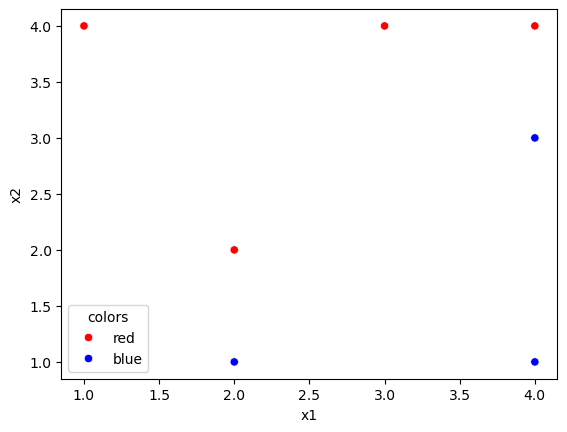

In [37]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
colors = ["red", "red", "red", "red", "blue", "blue", "blue"]
df_obs = pd.DataFrame(dict(x1=x1, x2=x2, colors=colors))
sns.scatterplot(data=df_obs, x='x1', y='x2', hue='colors', palette=['red','blue'])
plt.show()

(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane

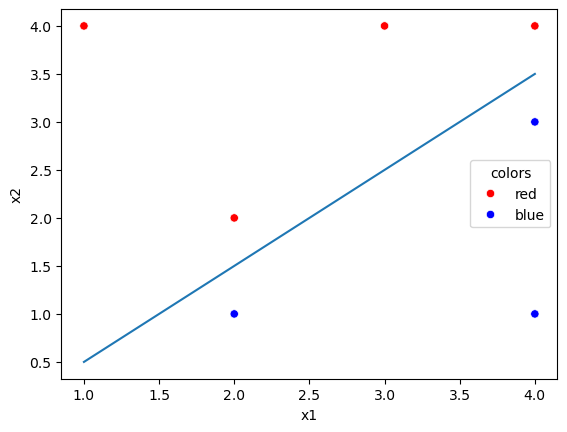

In [38]:
x = [1, 2, 3, 4]
y = [i-0.5 for i in x]
plt.plot(x, y)
sns.scatterplot(data=df_obs, x='x1', y='x2', hue='colors', palette=['red','blue'])
plt.show()

(c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if
β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

Let's write the classifier as $f(X) = 0.5 - X_1 + X_2$. We classify to Red if $f(X) > 0$, Blue otherwise.

(d) On your sketch, indicate the margin for the maximal margin hyperplane.

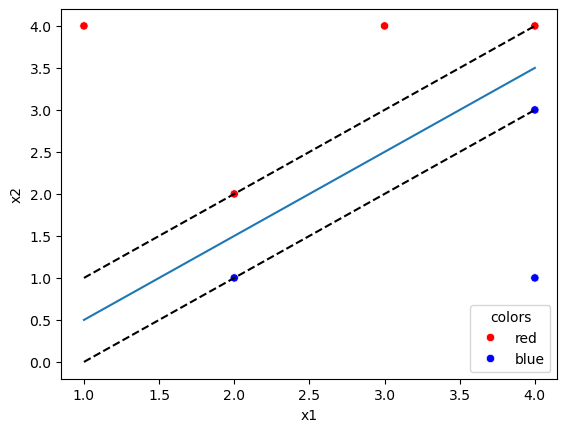

In [39]:
x = [1, 2, 3, 4]
y = [i-0.5 for i in x]
y1 = [i-1 for i in x]
y2 = [i for i in x]
plt.plot(x, y)
plt.plot(x, y1, 'k--')
plt.plot(x, y2, 'k--')
sns.scatterplot(data=df_obs, x='x1', y='x2', hue='colors', palette=['red','blue'])
plt.show()

(e) Indicate the support vectors for the maximal margin classifier.

The support vector is Red: (2, 2) and (4, 4) and Blue: (2, 1) and (4, 3). 

(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

The senventh observation is not the support vector. When the movement is small, it will not affect the maximal margin hyperplane. However, when the movement is large enough, i.e. the observation move into the margin, it will affect the maximal margin hyperplane.

(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

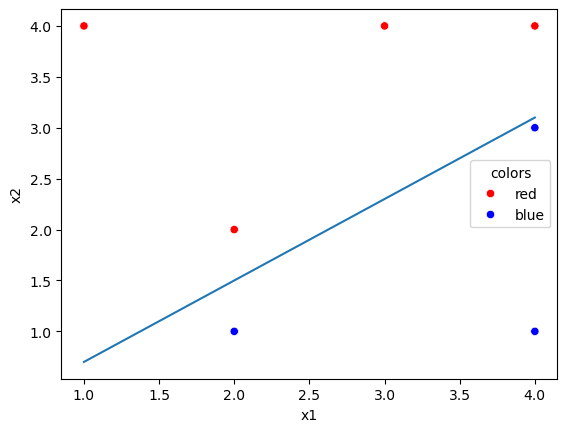

In [40]:
x = [1, 2, 3, 4]
y3 = [0.8*i-0.1 for i in x]
plt.plot(x, y3)
sns.scatterplot(data=df_obs, x='x1', y='x2', hue='colors', palette=['red','blue'])
plt.show()

This will not be an optimal separating hyperplane, which is given by $X_2 = 0.8 * X_1 - 0.1$. Notice the hyperplane still separate the classes.

(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

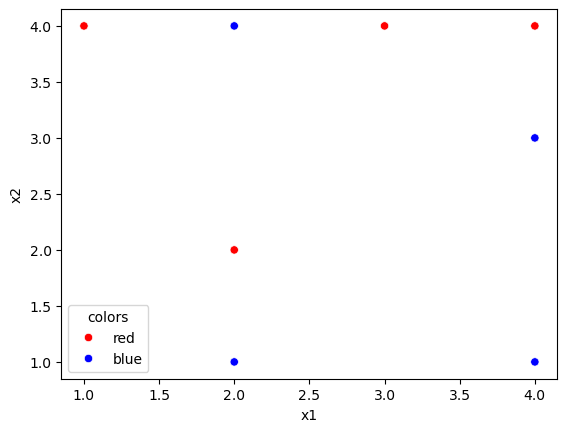

In [41]:
x1 = [3, 2, 4, 1, 2, 4, 4, 2]
x2 = [4, 2, 4, 4, 1, 3, 1, 4]
colors = ["red", "red", "red", "red", "blue", "blue", "blue", "blue"]
df_obs = pd.DataFrame(dict(x1=x1, x2=x2, colors=colors))
sns.scatterplot(data=df_obs, x='x1', y='x2', hue='colors', palette=['red','blue'])
plt.show()

After adding another observation at (2, 4) as Blue, the two classes are no longer separable by a hyperplane.